<a href="https://colab.research.google.com/github/lazarstanarevic/Pendulum-movement/blob/main/Pendulum_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kako bi se pokrenuo program prvo mora da se kompajluje ovaj deo

from sympy import *
init_printing()
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import math
from scipy import signal
from IPython.display import display, Latex
from sympy.physics.vector import vlatex, dynamicsymbols
from sympy.utilities.lambdify import lambdify

#promenljive koje koristimo u resavanju na pocetku
epsilon = 10000
g = 9.81
m = 1
l = 1

teta = math.pi/4
dteta = 0

ro = l
dro = 0

b=0.0


#------------------------------------------------------------------------------------------------------------
#PRONALAZENJE PARAMETARA NUMERICKI
#------------------------------------------------------------------------------------------------------------

def resavanjeNumericki(t, M, y):

  teta, dteta, ro, dro = y

  Moment = M(t)

  return [ dteta, -b*dteta/m-g*np.sin(teta)/ro-2*dteta*dro/ro + Moment/(m*ro*ro),

           dro,  -2*epsilon*dro-epsilon*epsilon*(ro-l)]

In [ ]:
#------------------------------------------------------------------------------------------------------------
#PRONALAZENJE PARAMETARA ANALITICKI
#------------------------------------------------------------------------------------------------------------

#za analiticko resavanje cemo koristiti aproksimacije da je θ mali ugao, tj. sin(θ)≈θ i cos(θ)≈1

t = symbols('t')
bb = symbols('bb',real=True)
θ = dynamicsymbols('θ',real=True)
M = dynamicsymbols('M',real=True)

ode=Eq( -m*l**2*diff(diff(θ,t),t) - bb*l**2*diff(θ,t) - g*m*l*θ + M , 0)

def silaOgranicenjaAnaliticki(moment, b, teta_0, dteta_0):
  eq = ode.subs(M, moment)

  eq = eq.subs(bb,b).simplify()

  display(Latex(vlatex(eq)))

  teta_analiticki = dsolve(eq,θ,ics={θ.subs(t,0): teta_0, diff(θ,t).subs(t,0): dteta_0})

  display(Latex(vlatex(teta_analiticki)))

  lambda_analiticki = -m*g*cos(teta_analiticki.rhs) - m*l*(diff(teta_analiticki.rhs,t))**2

  return lambda_analiticki.simplify()


Text(0, 0.5, 'Ugao otklona')

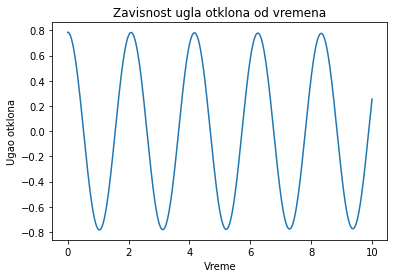

In [ ]:
#---------------------------------------------------------------------------------------------------------
#resavanje za slucaj kada je M=0 i b=0
#---------------------------------------------------------------------------------------------------------

def M0(t):
  return 0.0

time = np.linspace(0, 10, 10000)

sol = solve_ivp(fun = lambda t, y: resavanjeNumericki(t, M0, y), t_span = [time[0], time[-1]], y0 = [teta, dteta, l, 0], t_eval = time)

plt.plot(sol.t, sol.y[0])
plt.title ("Zavisnost ugla otklona od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugao otklona")


Text(0, 0.5, 'Ugaona brzina')

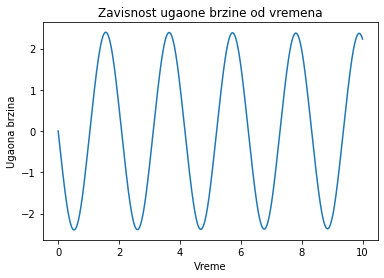

In [ ]:
plt.plot(sol.t, sol.y[1])
plt.title ("Zavisnost ugaone brzine od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugaona brzina")

Text(0, 0.5, 'y-osa')

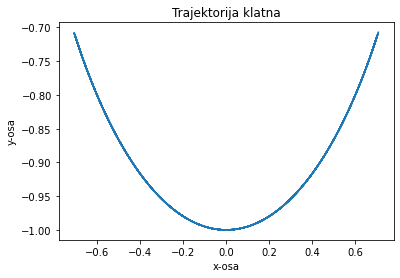

In [ ]:
plt.plot(sol.y[2]*np.sin(sol.y[0]), -sol.y[2]*np.cos(sol.y[0]))
plt.title ("Trajektorija klatna")
plt.xlabel("x-osa")
plt.ylabel("y-osa")

Text(0, 0.5, 'Ugaona brzina')

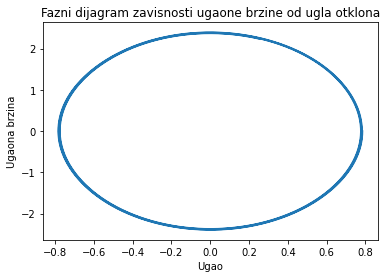

In [ ]:
plt.plot(sol.y[0], sol.y[1])
plt.title ("Fazni dijagram zavisnosti ugaone brzine od ugla otklona")
plt.xlabel("Ugao")
plt.ylabel("Ugaona brzina")

Text(0, 0.5, 'sila ogranicenja')

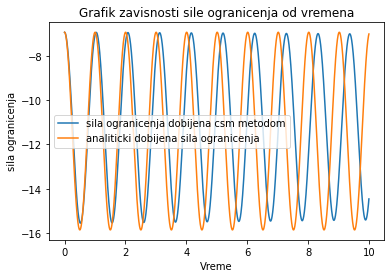

In [ ]:
plt.plot(sol.t, m*( -2*epsilon*sol.y[3]-epsilon*epsilon*(sol.y[2]-l))-m*g*np.cos(sol.y[0])-m*sol.y[2]*sol.y[1]*sol.y[1],label = "sila ogranicenja dobijena csm metodom")

λ = silaOgranicenjaAnaliticki(0,b,teta,dteta)
λ = lambdify([t], λ)

plt.plot(sol.t, λ(sol.t), label = "analiticki dobijena sila ogranicenja")

plt.legend()
plt.title("Grafik zavisnosti sile ogranicenja od vremena")
plt.xlabel("Vreme")
plt.ylabel("sila ogranicenja")

Text(0, 0.5, 'Jednačina ograničenja')

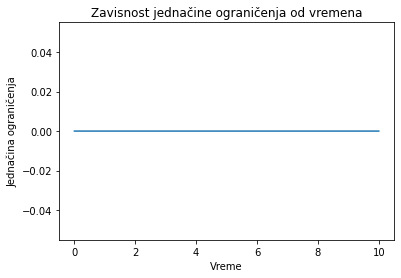

In [ ]:
plt.plot(sol.t, sol.y[2]-l)
plt.title ("Zavisnost jednačine ograničenja od vremena")
plt.xlabel("Vreme")
plt.ylabel("Jednačina ograničenja")

Text(0, 0.5, 'Ugao otklona')

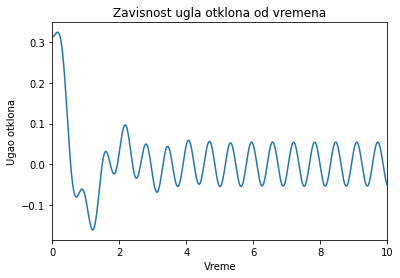

In [ ]:
#---------------------------------------------------------------------------------------------------------
#prelazimo na slucaj kada je M=M_0*cos(Omega*t) i b≠0
#---------------------------------------------------------------------------------------------------------

teta=pi/10
M_0=5
Omega=10
b=2

def M1(t):
  return M_0*np.cos(Omega*t)

time = np.linspace(0, 100, 100000)

sol = solve_ivp(fun = lambda t, y: resavanjeNumericki(t, M1, y), t_span = [time[0], time[-1]], y0 = [teta, dteta, l, 0], t_eval = time)

plt.xlim([0, 10])
plt.plot(sol.t, sol.y[0])
plt.title ("Zavisnost ugla otklona od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugao otklona")

Text(0, 0.5, 'Ugaona brzina')

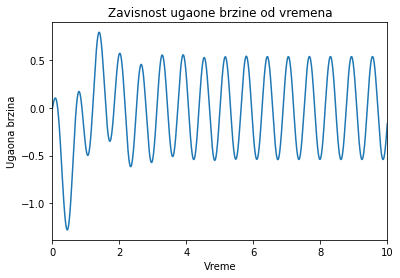

In [ ]:
plt.xlim([0, 10])
plt.plot(sol.t, sol.y[1])
plt.title ("Zavisnost ugaone brzine od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugaona brzina")

Text(0, 0.5, 'y-osa')

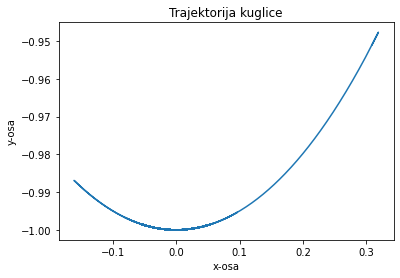

In [ ]:
plt.plot(sol.y[2]*np.sin(sol.y[0]), -sol.y[2]*np.cos(sol.y[0]))
plt.title ("Trajektorija kuglice")
plt.xlabel("x-osa")
plt.ylabel("y-osa")

Text(0, 0.5, 'Ugaona brzina')

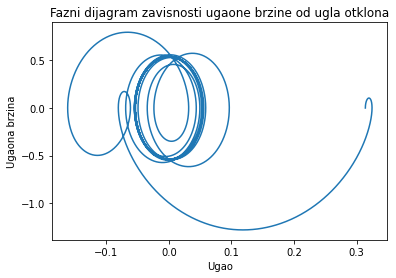

In [ ]:
plt.plot(sol.y[0], sol.y[1])
plt.title ("Fazni dijagram zavisnosti ugaone brzine od ugla otklona")
plt.xlabel("Ugao")
plt.ylabel("Ugaona brzina")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Text(0, 0.5, 'sila ogranicenja')

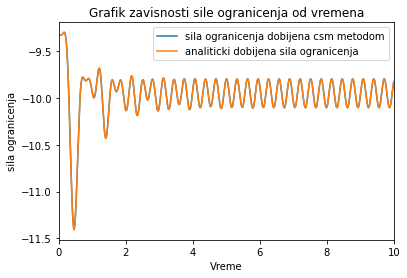

In [ ]:
plt.xlim([0,10])

plt.plot(sol.t, m*( -2*epsilon*sol.y[3]-epsilon*epsilon*(sol.y[2]-l))-m*g*np.cos(sol.y[0])-m*sol.y[2]*sol.y[1]*sol.y[1],label = "sila ogranicenja dobijena csm metodom")

λ = silaOgranicenjaAnaliticki(M_0*cos(Omega*t),b,teta,dteta)
λ = lambdify([t], λ)

plt.plot(sol.t, λ(sol.t), label = "analiticki dobijena sila ogranicenja")

plt.legend()
plt.title("Grafik zavisnosti sile ogranicenja od vremena")
plt.xlabel("Vreme")
plt.ylabel("sila ogranicenja")

Text(0, 0.5, 'Jednačina ograničenja')

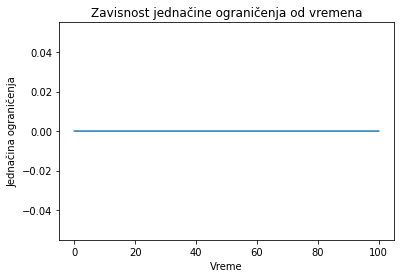

In [ ]:
plt.plot(sol.t, sol.y[2]-l)
plt.title ("Zavisnost jednačine ograničenja od vremena")
plt.xlabel("Vreme")
plt.ylabel("Jednačina ograničenja")

Text(0, 0.5, 'Ugao otklona')

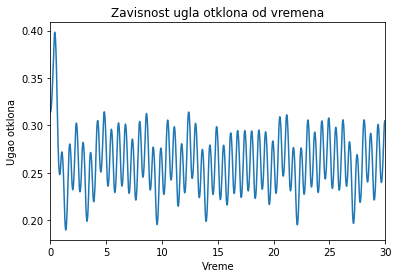

In [ ]:
#---------------------------------------------------------------------------------------------------------
#prelazimo na slucaj kada je M povorka pravougaonih impulsa i b≠0
#---------------------------------------------------------------------------------------------------------

teta=pi/10
M_0=5
Omega=10
b=2

def M2(t):

    return M_0*0.5*(np.sign(np.sin(Omega*t))+1)

time = np.linspace(0, 100, 10000)

sol = solve_ivp(fun = lambda t, y: resavanjeNumericki(t, M2, y), t_span = [time[0], time[-1]], y0 = [teta, dteta, l, 0], t_eval = time)

plt.xlim([0, 30])
plt.plot(sol.t, sol.y[0])
plt.title ("Zavisnost ugla otklona od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugao otklona")

Text(0, 0.5, 'Ugaona brzina')

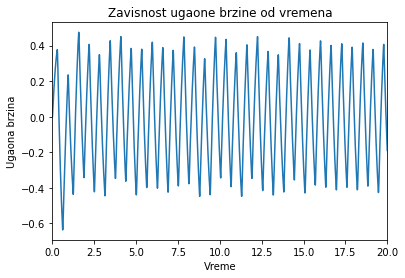

In [ ]:
plt.xlim([0, 20])
plt.plot(sol.t, sol.y[1])
plt.title ("Zavisnost ugaone brzine od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugaona brzina")

Text(0, 0.5, 'y-osa')

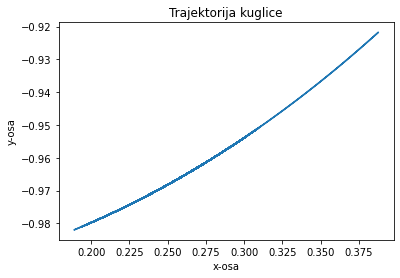

In [ ]:
plt.plot(sol.y[2]*np.sin(sol.y[0]), -sol.y[2]*np.cos(sol.y[0]))
plt.title ("Trajektorija kuglice")
plt.xlabel("x-osa")
plt.ylabel("y-osa")

Text(0, 0.5, 'Ugaona brzina')

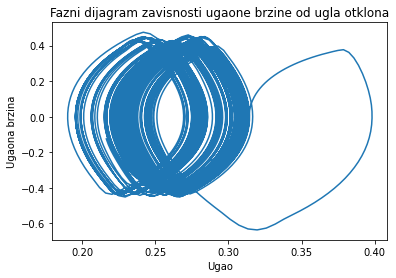

In [ ]:
plt.plot(sol.y[0], sol.y[1])
plt.title ("Fazni dijagram zavisnosti ugaone brzine od ugla otklona")
plt.xlabel("Ugao")
plt.ylabel("Ugaona brzina")

Text(0, 0.5, 'sila ogranicenja')

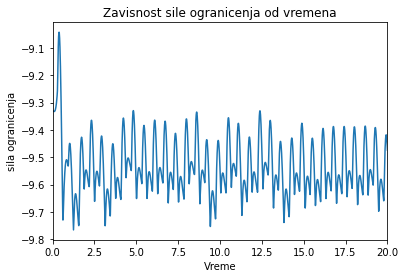

In [ ]:
plt.xlim([0,20])
plt.plot(sol.t, m*( -2*epsilon*sol.y[3]-epsilon*epsilon*(sol.y[2]-l))-m*g*np.cos(sol.y[0])-m*sol.y[2]*sol.y[1]*sol.y[1],label = "sila ogranicenja dobijena csm metodom")

plt.title("Zavisnost sile ogranicenja od vremena")
plt.xlabel("Vreme")
plt.ylabel("sila ogranicenja")

In [ ]:
#analiticki oblik sile za slucaj pravouganih impuplsa

silaOgranicenjaAnaliticki(M_0*0.5*(sign(sin(Omega*t))+1),b,teta,dteta)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

⎧                                                                             
⎪                                                                             
⎪                                                                             
⎪ ⎛                                                                           
⎪ ⎜     ⎛                        ⌠                                            
⎨ ⎜     ⎜                        ⎮  1.0⋅t                                     
⎪ ⎜     ⎜                        ⎮ ℯ     ⋅sin(2.96816441593117⋅t)⋅sin(10⋅t)   
⎪-⎜6.25⋅⎜sin(2.96816441593117⋅t)⋅⎮ ──────────────────────────────────────── dt
⎪ ⎜     ⎜                        ⎮               │sin(10⋅t)│                  
⎪ ⎝     ⎝                        ⌡                                            
⎩                                                                             

                                                                              
                                                   

Text(0, 0.5, 'Jednačina ograničenja')

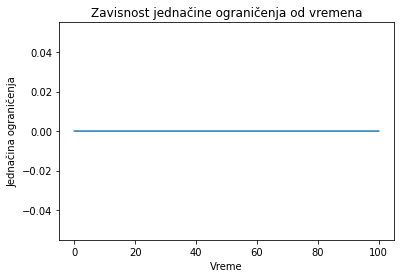

In [ ]:
plt.plot(sol.t, sol.y[2]-l)
plt.title ("Zavisnost jednačine ograničenja od vremena")
plt.xlabel("Vreme")
plt.ylabel("Jednačina ograničenja")

Text(0, 0.5, 'sila ogranicenja')

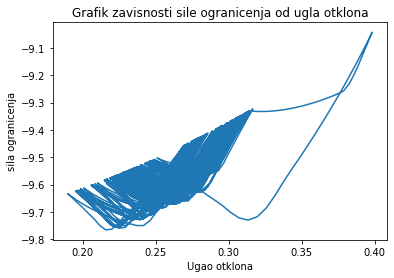

In [ ]:
plt.plot(sol.y[0], m*( -2*epsilon*sol.y[3]-epsilon*epsilon*(sol.y[2]-l))-m*g*np.cos(sol.y[0])-m*sol.y[2]*sol.y[1]*sol.y[1])
plt.title("Grafik zavisnosti sile ogranicenja od ugla otklona")
plt.xlabel("Ugao otklona")
plt.ylabel("sila ogranicenja")

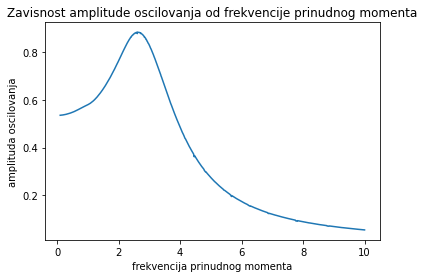

In [ ]:
#---------------------------------------------------------------------------------------------------------
#amplitudska karakteristika
#---------------------------------------------------------------------------------------------------------

#t = symbols('t')

M_0=5
b=2


freq = np.linspace(0.1, 10, 1000)
ampl = []

def M1(t):
  return M_0*np.cos(Omega*t)

for Omega in freq:
  tspan = np.linspace(0, min(100,100/Omega), int(min(1000,1000/Omega)))

  sol = solve_ivp(fun = lambda t, y: resavanjeNumericki(t, M1, y), t_span = [tspan[0], tspan[-1]], y0 = [0, 0, l, 0], t_eval = tspan)

  ampl.append(max(sol.y[0][int(min(1000,1000/Omega))//2:int(min(1000,1000/Omega))]))

ampl = np.array(ampl)
plt.plot(freq, ampl)
plt.title("Zavisnost amplitude oscilovanja od frekvencije prinudnog momenta")
plt.xlabel("frekvencija prinudnog momenta")
plt.ylabel("amplituda oscilovanja")
plt.show()


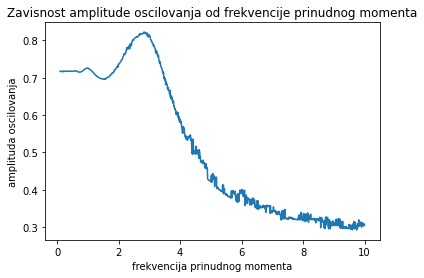

In [ ]:
M_0=5
b=2
freq = np.linspace(0.1, 10, 1000)
ampl = []

def M2(t):

  return M_0*0.5*(np.sign(np.sin(Omega*t))+1)

for Omega in freq:
  tspan = np.linspace(0, min(100,100/Omega), int(min(1000,1000/Omega)))

  sol = solve_ivp(fun = lambda t, y: resavanjeNumericki(t, M2, y), t_span = [tspan[0], tspan[-1]], y0 = [0, 0, l, 0], t_eval = tspan)

  ampl.append(max(sol.y[0][int(min(1000,1000/Omega))//2:int(min(1000,1000/Omega))]))

ampl = np.array(ampl)
plt.plot(freq, ampl)
plt.title("Zavisnost amplitude oscilovanja od frekvencije prinudnog momenta")
plt.xlabel("frekvencija prinudnog momenta")
plt.ylabel("amplituda oscilovanja")
plt.show()